[*소득 예측 AI 해커톤*](https://dacon.io/competitions/official/236230/overview/description)

    Best: 535.9317418552 (Catboost)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ML_8')

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

###  info & describe

- ID : 학습 데이터 고유 ID
- Age
- Gender
- Education_Status
- Employment_Status
- Working_Week (Yearly)
- Industry_Status
- Occupation_Status
- Race
- Hispanic_Origin
- Martial_Status
- Household_Status
- Household_summary
- Citizenship
- Birth_Country: 국적
- Birth_Country (Father): 국적 (부)
- Birth_Country (Mother): 국적 (모)
- Tax_Status
- Gains: 소득
- Losses: 손실
- Divdends: 배당
- Incom_Status: 최종 소득
- Income : 1시간 단위의 근로 소득

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,35.63250,17.994414,0.0,23.0,34.0,47.0,90.0
Working_Week (Yearly),20000.0,34.94305,22.254592,0.0,7.0,52.0,52.0,52.0
Gains,20000.0,383.12950,4144.247487,0.0,0.0,0.0,0.0,99999.0
Losses,20000.0,40.20215,279.182677,0.0,0.0,0.0,0.0,4356.0
Dividends,20000.0,123.45145,1206.949429,0.0,0.0,0.0,0.0,45000.0
Income,20000.0,554.56525,701.553155,0.0,0.0,500.0,875.0,9999.0


In [ ]:
train.describe(include="object").T

,count,unique,top,freq
ID,20000,20000,TRAIN_00000,1
Gender,20000,2,F,10472
Education_Status,20000,17,High graduate,6494
Employment_Status,20000,8,Children or Armed Forces,11142
Industry_Status,20000,24,Not in universe or children,4688
Occupation_Status,20000,15,Unknown,4688
Race,20000,5,White,16845
Hispanic_Origin,20000,10,All other,17769
Martial_Status,20000,7,Married,9554
Household_Status,20000,31,Householder,6087


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      10000 non-null  object  
 1   Age                     10000 non-null  int64   
 2   Gender                  10000 non-null  category
 3   Education_Status        10000 non-null  category
 4   Employment_Status       10000 non-null  category
 5   Working_Week (Yearly)   10000 non-null  int64   
 6   Industry_Status         10000 non-null  category
 7   Occupation_Status       10000 non-null  category
 8   Race                    10000 non-null  category
 9   Hispanic_Origin         10000 non-null  category
 10  Martial_Status          10000 non-null  category
 11  Household_Status        9999 non-null   category
 12  Household_Summary       10000 non-null  category
 13  Citizenship             10000 non-null  category
 14  Birth_Country          

In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,35.9450,17.947835,0.0,23.0,35.0,47.0,90.0
Working_Week (Yearly),10000.0,35.1818,22.187519,0.0,8.0,52.0,52.0,52.0
Gains,10000.0,418.6794,4495.740020,0.0,0.0,0.0,0.0,99999.0
Losses,10000.0,37.4297,266.559206,0.0,0.0,0.0,0.0,2754.0
Dividends,10000.0,140.1007,1540.462778,0.0,0.0,0.0,0.0,99999.0


In [ ]:
test.describe(include="object").T

,count,unique,top,freq
ID,10000,10000,TEST_0000,1
Gender,10000,2,F,5206
Education_Status,10000,17,High graduate,3173
Employment_Status,10000,8,Children or Armed Forces,5566
Industry_Status,10000,24,Not in universe or children,2316
Occupation_Status,10000,15,Unknown,2316
Race,10000,5,White,8364
Hispanic_Origin,10000,10,All other,8932
Martial_Status,10000,7,Married,4862
Household_Status,9999,27,Householder,3128


### 전처리

In [ ]:
# test 결측치

# test['Household_Status'].fillna(train['Household_Status'].mode()[0], inplace=True)
test['Household_Status'].fillna('None', inplace=True)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.0 MB/s eta 0:00:00


catboost feature_importances_

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

for i in col:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

In [ ]:
from catboost import CatBoostRegressor, Pool

x_train = train.drop(['ID', 'Income'], axis=1)
x_test = test.drop(['ID'], axis=1)
y_train = train['Income']
train_pool = Pool(data=x_train, label=y_train, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

Learning rate set to 0.065727
0:	learn: 691.0376612	total: 174ms	remaining: 2m 53s
100:	learn: 585.1885969	total: 16.8s	remaining: 2m 29s
200:	learn: 578.8198544	total: 27.3s	remaining: 1m 48s
300:	learn: 572.6212097	total: 34.9s	remaining: 1m 21s
400:	learn: 566.3089345	total: 42.7s	remaining: 1m 3s
500:	learn: 561.7168004	total: 48.7s	remaining: 48.5s
600:	learn: 557.0305814	total: 56.7s	remaining: 37.7s
700:	learn: 552.1035116	total: 1m 3s	remaining: 26.9s
800:	learn: 548.0780018	total: 1m 11s	remaining: 17.7s
900:	learn: 544.6742114	total: 1m 17s	remaining: 8.54s
999:	learn: 541.9223162	total: 1m 25s	remaining: 0us


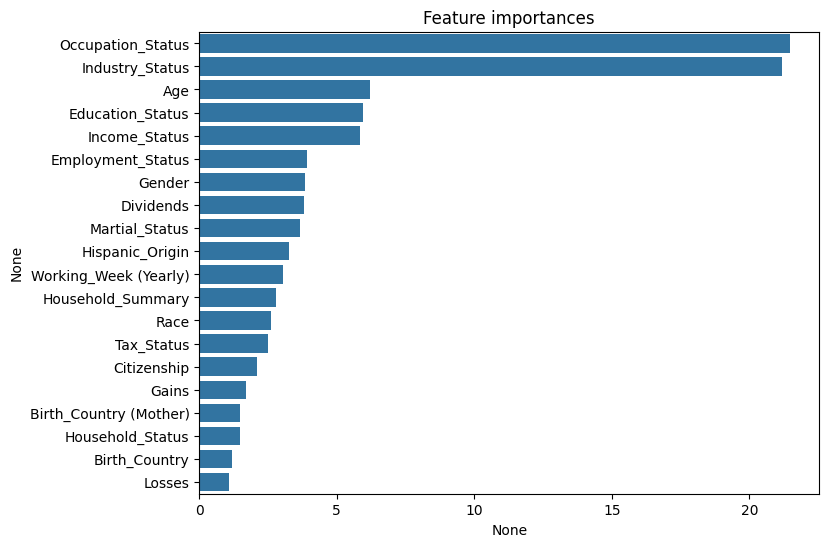

In [ ]:
cat_importances_values = clf.feature_importances_
cat_importances = pd.Series(cat_importances_values, index=x_train.columns)
cat_top20 = cat_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=cat_top20, y=cat_top20.index)
plt.show()

In [ ]:
cat_importances.sort_values(ascending=False)

Occupation_Status         21.468049
Industry_Status           21.198977
Age                        6.223026
Education_Status           5.969338
Income_Status              5.861416
Employment_Status          3.921542
Gender                     3.853467
Dividends                  3.798535
Martial_Status             3.652465
Hispanic_Origin            3.262638
Working_Week (Yearly)      3.033458
Household_Summary          2.798620
Race                       2.611981
Tax_Status                 2.515411
Citizenship                2.088959
Gains                      1.692843
Birth_Country (Mother)     1.475458
Household_Status           1.470169
Birth_Country              1.179211
Losses                     1.090753
Birth_Country (Father)     0.833682
dtype: float64

Hispanic_Origin

In [ ]:
train['Hispanic_Origin'] = train['Hispanic_Origin'].replace('NA', 'Do not know')
test['Hispanic_Origin'] = test['Hispanic_Origin'].replace('NA', 'Do not know')

### log

In [ ]:
# 1000, 5000, 10000

log_train = pd.read_csv('train.csv')
log_test = pd.read_csv('test.csv')
log_test['Household_Status'].fillna('None', inplace=True)

for c in ['Gains', 'Losses', 'Dividends', 'Income']:
    log_train[c] = np.log(log_train[c] + 10000)

for c in ['Gains', 'Losses', 'Dividends']:
    log_test[c] = np.log(log_test[c] + 10000)

log_train.to_csv("log_train.csv", index=False)
log_test.to_csv("log_test.csv", index=False)

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

for i in col:
    log_train[i] = log_train[i].astype('category')
    log_test[i] = log_test[i].astype('category')

In [ ]:
from catboost import CatBoostRegressor, Pool

x_train = log_train.drop(['ID', 'Income'], axis=1)
x_test = log_test.drop(['ID'], axis=1)
y_train = log_train['Income']
train_pool = Pool(data=x_train, label=y_train, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

test_pool = Pool(data=x_test, cat_features=col)
pred = clf.predict(test_pool)
pred = np.exp(pred) - 10000
pred = [0 if i < 0 else i for i in pred]

Learning rate set to 0.065727
0:	learn: 0.0605053	total: 51.4ms	remaining: 51.4s
100:	learn: 0.0502163	total: 6.31s	remaining: 56.2s
200:	learn: 0.0495500	total: 12.5s	remaining: 49.7s
300:	learn: 0.0490775	total: 20.1s	remaining: 46.8s
400:	learn: 0.0487719	total: 33.1s	remaining: 49.4s
500:	learn: 0.0482801	total: 41.4s	remaining: 41.2s
600:	learn: 0.0478804	total: 48.8s	remaining: 32.4s
700:	learn: 0.0475462	total: 54.6s	remaining: 23.3s
800:	learn: 0.0472133	total: 1m 1s	remaining: 15.4s
900:	learn: 0.0469243	total: 1m 7s	remaining: 7.46s
999:	learn: 0.0466103	total: 1m 14s	remaining: 0us


In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0
df_submit.to_csv("catboost_submission11.csv", index=False)

5000 > 537.1806321804

    train_y[(train['Income'] > 3000) & (train['Income_Status'] == 'Under Median')] /= 10

In [ ]:
train_x = train.drop(columns = ['ID','Income'])
train_y = train['Income']
train_y[(train['Income'] > 3000) & (train['Income_Status'] == 'Under Median')] /= 10
test_x = test.drop(columns = ['ID'])

<ipython-input-16-863aaea3a31d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y[(train['Income'] > 3000) & (train['Income_Status'] == 'Under Median')] /= 10


In [ ]:
train_y = np.log(train_y + 5000)

for c in ['Gains', 'Losses', 'Dividends']:
    train_x[c] = np.log(train_x[c] + 5000)
    test_x[c] = np.log(test_x[c] + 5000)

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

for i in col:
    train_x[i] = train_x[i].astype('category')
    test_x[i] = test_x[i].astype('category')

In [ ]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(data=train_x, label=train_y, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

Learning rate set to 0.065727
0:	learn: 0.0000208	total: 100ms	remaining: 1m 40s
100:	learn: 0.0000166	total: 6.87s	remaining: 1m 1s
200:	learn: 0.0000163	total: 18s	remaining: 1m 11s
300:	learn: 0.0000161	total: 25.1s	remaining: 58.2s
400:	learn: 0.0000160	total: 33.2s	remaining: 49.6s
500:	learn: 0.0000159	total: 40.1s	remaining: 39.9s
600:	learn: 0.0000157	total: 51.6s	remaining: 34.3s
700:	learn: 0.0000156	total: 1m 5s	remaining: 27.8s
800:	learn: 0.0000154	total: 1m 18s	remaining: 19.5s
900:	learn: 0.0000153	total: 1m 29s	remaining: 9.84s
999:	learn: 0.0000152	total: 1m 35s	remaining: 0us


In [ ]:
test_pool = Pool(data=test_x, cat_features=col)
pred = clf.predict(test_pool)
pred = np.exp(pred) - 5000
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0
df_submit.to_csv("catboost_submission12.csv", index=False)

    train1 = train[(train['Income'] < 3000)]

In [ ]:
train1 = train[(train['Income'] < 3000)]
train_x = train1.drop(columns = ['ID','Income'])
train_y = train1['Income']
test_x = test.drop(columns = ['ID'])

In [ ]:
train_y = np.log(train_y + 5000)

for c in ['Gains', 'Losses', 'Dividends']:
    train_x[c] = np.log(train_x[c] + 5000)
    test_x[c] = np.log(test_x[c] + 5000)

In [ ]:
col = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

for i in col:
    train_x[i] = train_x[i].astype('category')
    test_x[i] = test_x[i].astype('category')

In [ ]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(data=train_x, label=train_y, cat_features=col)

In [ ]:
clf = CatBoostRegressor(random_state=42, verbose=100)
clf.fit(train_pool)

Learning rate set to 0.065693
0:	learn: 0.0997398	total: 104ms	remaining: 1m 43s
100:	learn: 0.0779015	total: 7.2s	remaining: 1m 4s
200:	learn: 0.0764775	total: 15.1s	remaining: 1m
300:	learn: 0.0756790	total: 21.2s	remaining: 49.2s
400:	learn: 0.0750837	total: 29.2s	remaining: 43.6s
500:	learn: 0.0744347	total: 35.4s	remaining: 35.2s
600:	learn: 0.0738429	total: 44.1s	remaining: 29.3s
700:	learn: 0.0732762	total: 50.4s	remaining: 21.5s
800:	learn: 0.0726751	total: 58.5s	remaining: 14.5s
900:	learn: 0.0720415	total: 1m 4s	remaining: 7.13s
999:	learn: 0.0715523	total: 1m 13s	remaining: 0us


In [ ]:
test_pool = Pool(data=test_x, cat_features=col)
pred = clf.predict(test_pool)
pred = np.exp(pred) - 5000
pred = [0 if i < 0 else i for i in pred]

In [ ]:
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Income'] = pred
df_submit.loc[x_test['Employment_Status'] == 'Not working', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
df_submit.loc[x_test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Unknown', 'Income'] = 0
df_submit.loc[x_test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
df_submit.loc[x_test['Birth_Country'] == 'Panama', 'Income'] = 0
df_submit.loc[x_test['Age'] < 15, 'Income'] = 0
df_submit.to_csv("catboost_submission13.csv", index=False)